### Importing data

In [3]:
import pandas as pd
import numpy as np

In [4]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['train']=1
test['train']=0
test['survived']=np.nan

df = pd.concat([train, test])
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
df = df.set_index('passengerid')
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,train
passengerid,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Some vizualizations 

In [7]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,train
passengerid,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


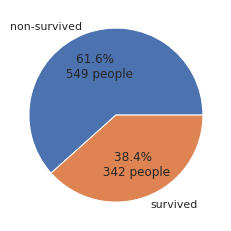

In [9]:
values = train['survived'].value_counts()

fig, ax = plt.subplots()
ax.pie(values, 
       labels=values.index.map({1:'survived', 0:'non-survived'}),
       autopct=lambda x: '{:.1f}% \n {:.0f} people'.format(x, x*values.sum()/100))
plt.show()

In [10]:
def make_stacked_bar(name_col):
  a = train.groupby(['survived', name_col])['passengerid'].count()

  labels = a[0].index.values.astype('str')


  fig, ax = plt.subplots()

  ax.bar(labels, a[0].values, label='non-survived')
  ax.bar(labels, a[1].values, bottom=a[0].values, label='survived')
  ax.legend()
  ax.set_ylabel('number of people')
  ax.set_xlabel(name_col)

  plt.show()


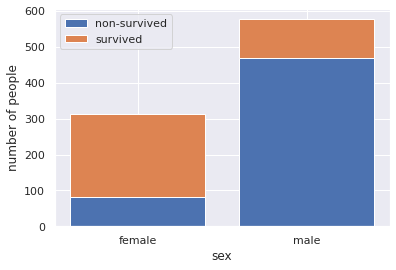

In [11]:
make_stacked_bar('sex')

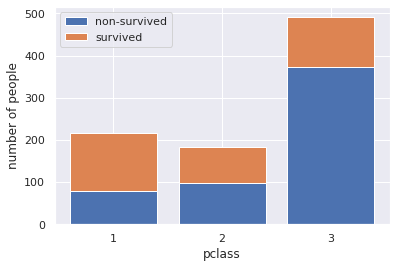

In [12]:
make_stacked_bar('pclass')

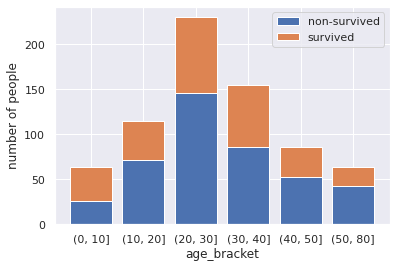

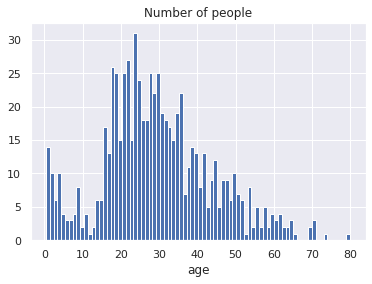

In [13]:
train['age_bracket'] = pd.cut(x=train['age'], bins=(0,10,20,30,40,50,80))
make_stacked_bar('age_bracket')

print('\n')
fig, ax = plt.subplots()
ax.hist(train['age'], bins=80)
ax.set_title('Number of people')
ax.set_xlabel('age')
plt.show()

### Preprocessing

In [14]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,train
passengerid,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
df['sex'] = df['sex'].map({'male':1, 'female':0})
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,train
passengerid,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
df.drop('ticket', axis=1, inplace=True)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,train
passengerid,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,1


In [17]:
df = df[~df['age'].isna()]
df = df[~df['embarked'].isna()]
df = df[~df['fare'].isna()]
df.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,train
passengerid,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,1


In [18]:
df['cabin'] = df['cabin'].str[0]
df['cabin'] = df['cabin'].fillna(0)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,train
passengerid,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C,1
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,S,1
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,S,1


In [20]:
array = df['name'].str.split('.')
df['title'] = [val[0].split(' ')[-1] for val in array]

df.drop('name', axis=1, inplace=True)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,train,title
passengerid,,,,,,,,,,,
1,0.0,3,1,22.0,1,0,7.2500,0,S,1,Mr
2,1.0,1,0,38.0,1,0,71.2833,C,C,1,Mrs
3,1.0,3,0,26.0,0,0,7.9250,0,S,1,Miss
4,1.0,1,0,35.0,1,0,53.1000,C,S,1,Mrs
5,0.0,3,1,35.0,0,0,8.0500,0,S,1,Mr


In [21]:
df['title'].value_counts()

Mr          580
Miss        209
Mrs         169
Master       53
Rev           8
Dr            7
Col           4
Major         2
Mlle          2
Countess      1
Lady          1
Mme           1
Capt          1
Ms            1
Don           1
Jonkheer      1
Dona          1
Sir           1
Name: title, dtype: int64

In [22]:
titles = df['title'].value_counts()
df['title'] = np.where( titles[df.title]>10  , df.title, 'other')
df['title'].value_counts()

Mr        580
Miss      209
Mrs       169
Master     53
other      32
Name: title, dtype: int64

In [23]:
data = pd.get_dummies(df, drop_first=True)

In [24]:
train = data[data.train==1].drop('train', axis=1)
test = data[data.train==0].drop(['train', 'survived'], axis=1)

x_train = train.iloc[:,1:]
y_train = train['survived']

x_train

,pclass,sex,age,sibsp,parch,fare,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_other
passengerid,,,,,,,,,,,,,,,,,,,,
1,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,3,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5,3,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,3,0,39.0,0,5,29.1250,0,0,0,0,0,0,0,0,1,0,0,0,1,0
887,2,1,27.0,0,0,13.0000,0,0,0,0,0,0,0,0,0,1,0,0,0,1
888,1,0,19.0,0,0,30.0000,0,1,0,0,0,0,0,0,0,1,1,0,0,0


### Feature selection


In [25]:
# https://machinelearningmastery.com/feature-selection-with-categorical-data/
# Chi-Squared Feature Selection 

### Preparing ML model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.predict(test)

In [ ]:
results = pd.DataFrame(np.c_[test.index, log_reg.predict(test)], columns = ['PassengerId', 'Survived'])